In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import os


In [3]:
trainlabel="e:/classify-leaves/train.csv"
testlabel="e:/classify-leaves/test.csv"

Imagem="e:/classify-leaves/images/"

In [4]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.vis_utils import plot_model
from glob import glob

In [5]:

cs=pd.read_csv(trainlabel)
css=cs.head(300)
imagea=cs["image"]
imagel=cs["label"]

x_data = [] 
y_data = [] 

imagea.__len__

<bound method Series.__len__ of 0            images/0.jpg
1            images/1.jpg
2            images/2.jpg
3            images/3.jpg
4            images/4.jpg
               ...       
18348    images/18348.jpg
18349    images/18349.jpg
18350    images/18350.jpg
18351    images/18351.jpg
18352    images/18352.jpg
Name: image, Length: 18353, dtype: object>

In [6]:

# for category in glob("E:/classify-leaves/images"+"/*"):
n=0
for file in imagea:
    img_array=cv2.imread("e:/classify-leaves/"+file)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(imagel[n])
    n=n+1


In [7]:
        
data=pd.DataFrame({'image': x_data,'label': y_data})
data.head(20)

image  \
0   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
1   [[[198, 208, 200], [198, 208, 200], [198, 208,...   
2   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
3   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
4   [[[193, 209, 198], [193, 209, 198], [195, 208,...   
5   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
6   [[[255, 255, 255], [255, 255, 255], [255, 255,...   
7   [[[255, 255, 255], [255, 255, 255], [255, 255,...   
8   [[[254, 254, 254], [254, 254, 254], [254, 254,...   
9   [[[192, 205, 195], [192, 205, 195], [192, 205,...   
10  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
11  [[[120, 158, 143], [120, 158, 143], [123, 157,...   
12  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
13  [[[109, 129, 136], [105, 125, 132], [106, 127,...   
14  [[[213, 242, 238], [216, 245, 241], [219, 245,...   
15  [[[122, 138, 127], [123, 139, 128], [124, 140,...   
16  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
17  [[[195, 213, 201], [195, 213, 201], [196, 212,...   
18  [[[254, 254, 254], [254, 254, 254], [254, 254,...   
19  [[[188, 198, 190], [187, 197, 189], [186, 196,...   

                       label  
0           maclura_pomifera  
1           maclura_pomifera  
2           maclura_pomifera  
3           maclura_pomifera  
4           maclura_pomifera  
5           maclura_pomifera  
6                ulmus_rubra  
7   broussonettia_papyrifera  
8           maclura_pomifera  
9   broussonettia_papyrifera  
10          maclura_pomifera  
11         prunus_virginiana  
12          maclura_pomifera  
13         prunus_virginiana  
14  broussonettia_papyrifera  
15          maclura_pomifera  
16          maclura_pomifera  
17  broussonettia_papyrifera  
18          maclura_pomifera  
19               ulmus_rubra

In [8]:
data.shape

(18353, 2)

In [9]:
from collections import Counter
c=Counter(y_data)
cl=c.__len__()
c

Counter({'maclura_pomifera': 353,
         'ulmus_rubra': 235,
         'prunus_virginiana': 223,
         'acer_rubrum': 217,
         'broussonettia_papyrifera': 214,
         'prunus_sargentii': 209,
         'ptelea_trifoliata': 193,
         'ulmus_pumila': 189,
         'abies_concolor': 176,
         'asimina_triloba': 174,
         'diospyros_virginiana': 173,
         'quercus_montana': 173,
         'ilex_opaca': 170,
         'liriodendron_tulipifera': 161,
         'acer_negundo': 156,
         'styrax_japonica': 155,
         'quercus_muehlenbergii': 154,
         'aesculus_pavi': 153,
         'juglans_cinerea': 145,
         'chionanthus_virginicus': 145,
         'catalpa_bignonioides': 145,
         'cercis_canadensis': 144,
         'ulmus_americana': 143,
         'cryptomeria_japonica': 141,
         'staphylea_trifolia': 141,
         'acer_palmatum': 141,
         'ostrya_virginiana': 138,
         'fraxinus_nigra': 135,
         'carya_cordiformis': 130,
        

In [10]:
cl=176
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(cl)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256  

In [1]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3),activation="relu"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dense(128,activation='relu'))
model.add(Dense(cl,activation='softmax'))
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics=["accuracy"])

NameError: name 'Sequential' is not defined

In [11]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [12]:
cs.head
cst=pd.read_csv("e:/classify-leaves/sample_submission.csv")

In [13]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=cs,
        directory="E:/classify-leaves",
        x_col="image",
        y_col="label",
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical",
        classes=c)
test_generator = test_datagen.flow_from_dataframe(
        dataframe=cst,
        directory="E:/classify-leaves",
        x_col="image",
        y_col="label",
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical",
        classes=c)

# test_generator = test_datagen.flow_from_directory(
#         "e:/classify-leaves/images/", 
#         target_size= (224,224),
#         batch_size = batch_size,
#         color_mode= "rgb",
#         class_mode= "categorical")
# tg=train_datagen.flow_from_dataframe(
#         data,
#         "E:/classify-leaves/images/*",
#         target_size= (224,224),
#         batch_size = batch_size,
#         color_mode= "rgb",
#         class_mode= "categorical",
#         classes=c)

#tdg=train_datagen.flow(x_data,y_data)
# tt=train_datagen.flow_from_dataframe(
#     dataframe=cs,
#     directory="E:/classify-leaves/images/",
#     target_size= (224,224,224),
#     color_mode= "rgb",
#     class_mode= "categorical",
#     classes=c
# )

Found 18353 validated image filenames belonging to 176 classes.
Found 8800 validated image filenames belonging to 176 classes.


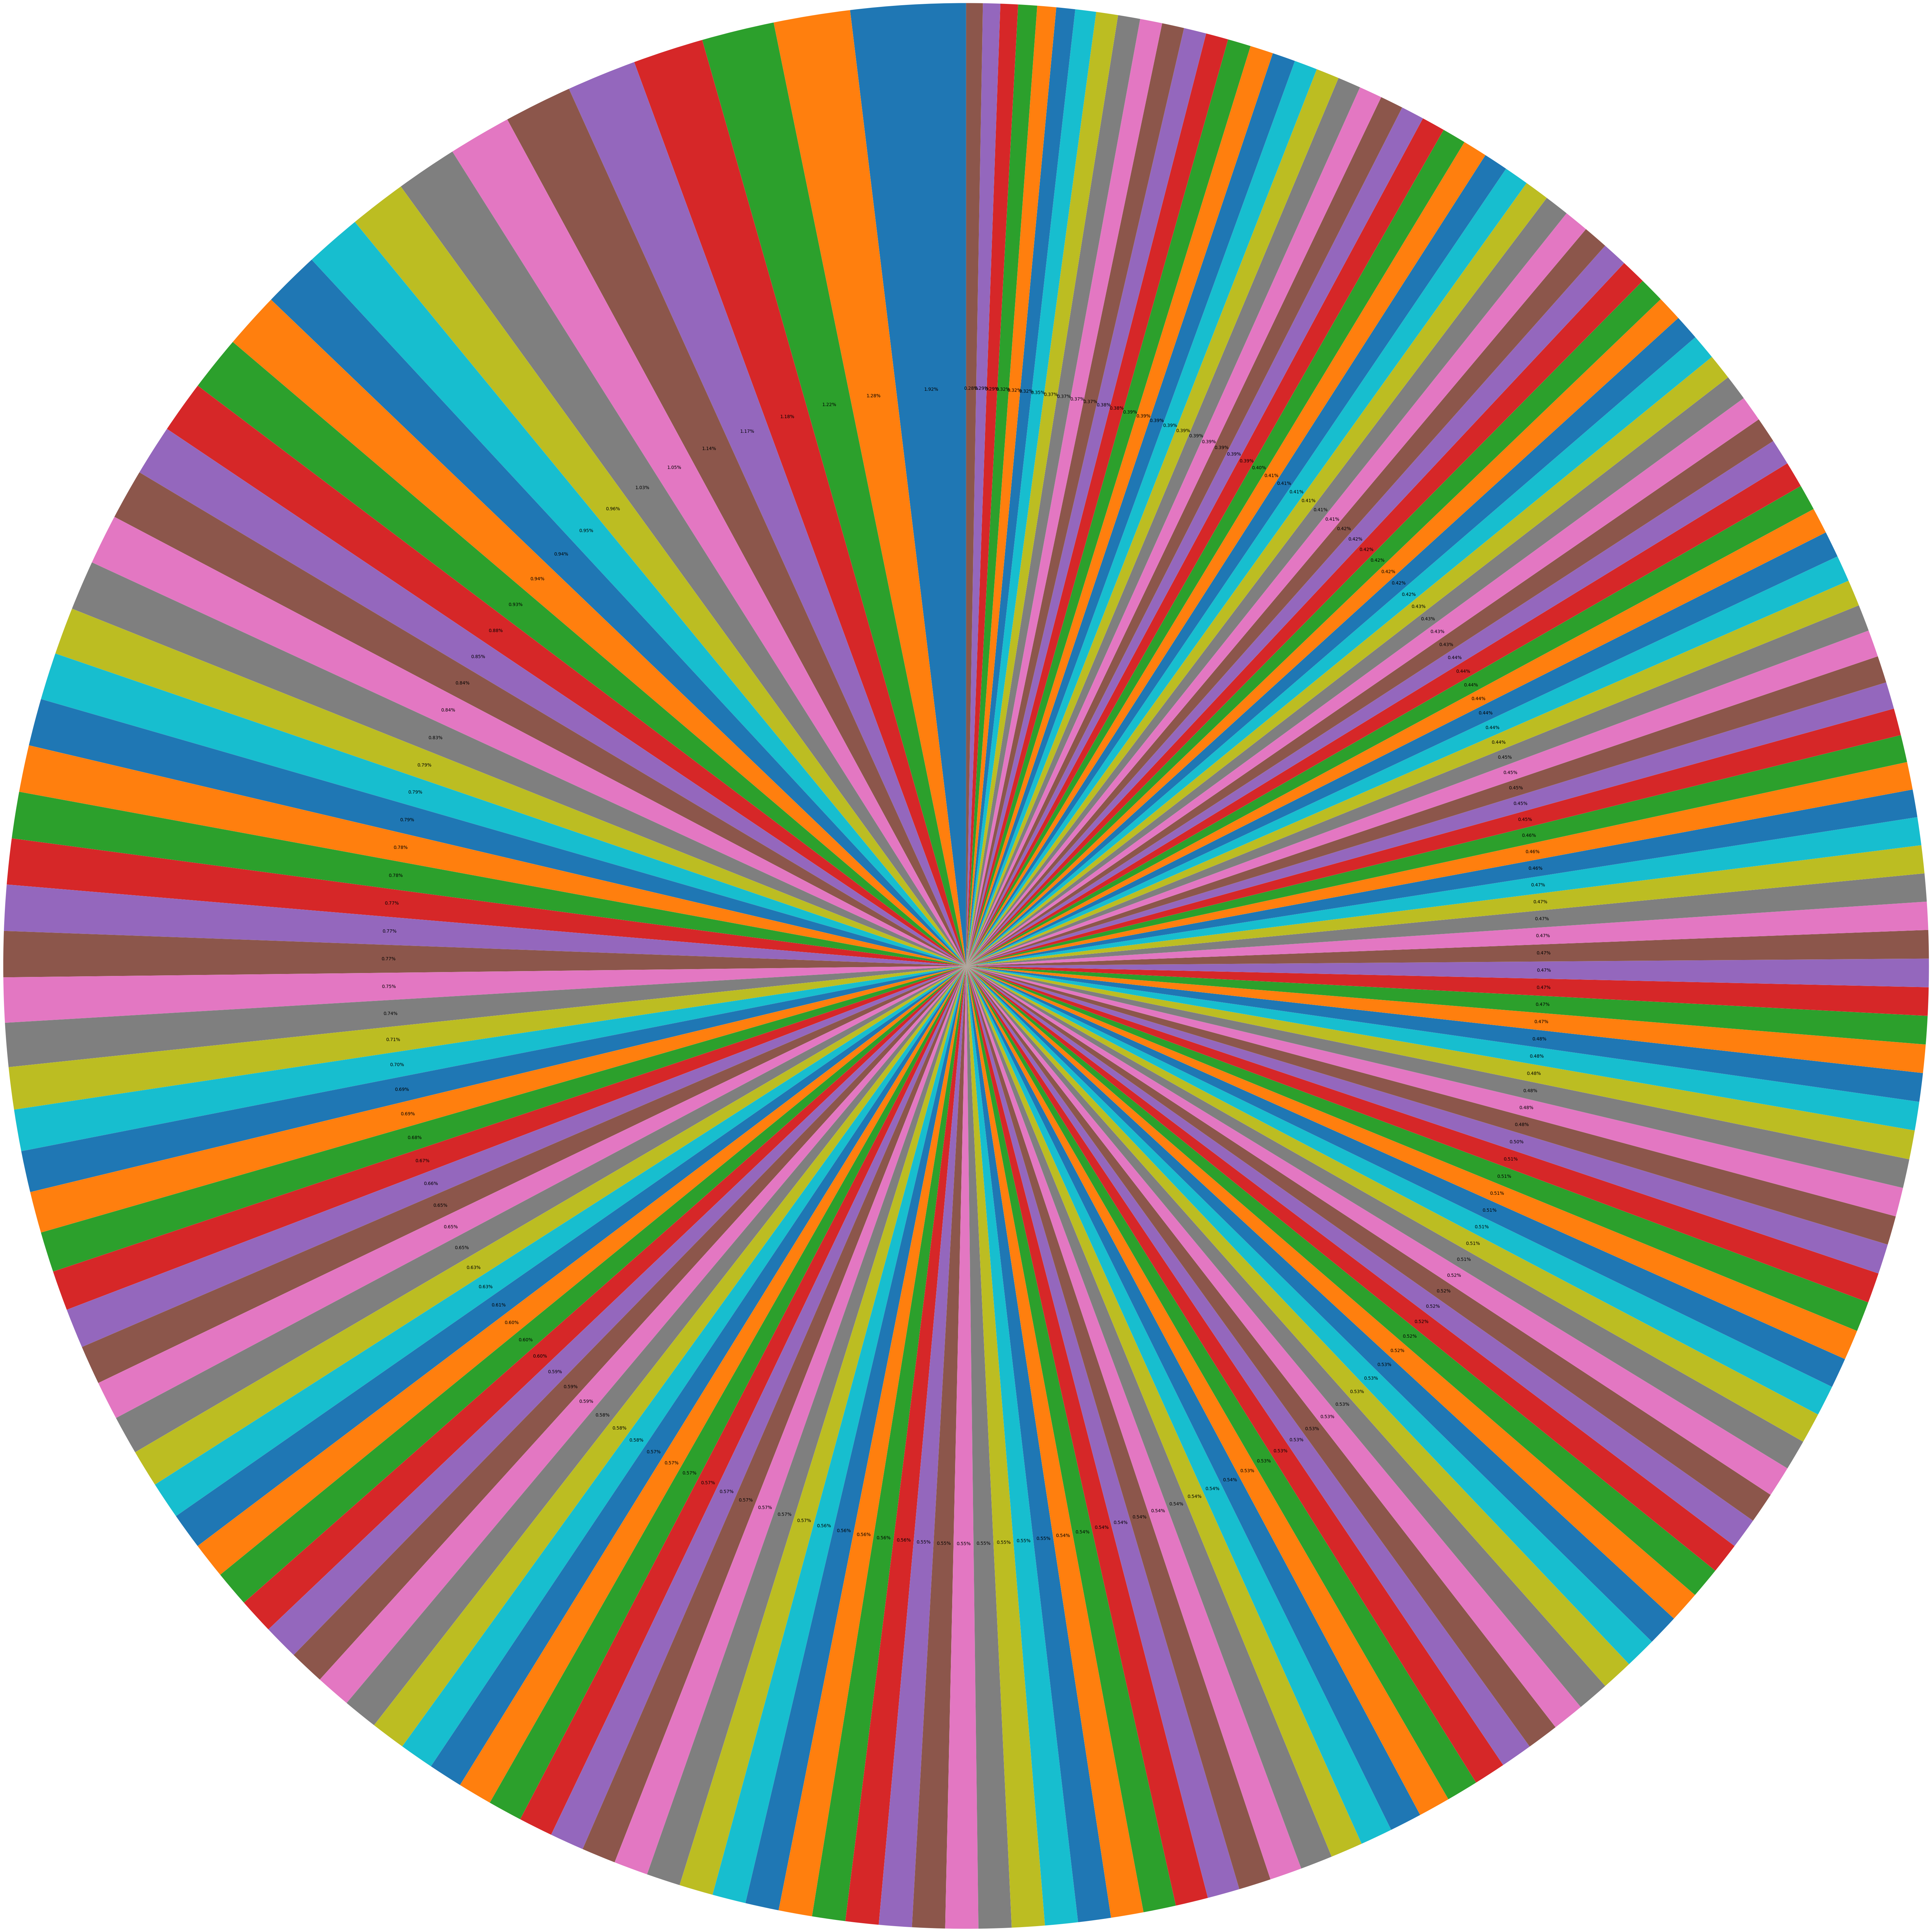

In [14]:
#colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,autopct='%0.2f%%',radius=20)
plt.show()

In [15]:
model.fit_generator(
        generator = train_generator,
        epochs=10,
        steps_per_epoch=72,
        validation_data=test_generator
        )
model.save("model.h5")

C:\Users\vwadh\AppData\Local\Temp\ipykernel_1916\3016961437.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
14/72 [====>.........................] - ETA: 54:12 - loss: 0.7135 - accuracy: 0.0059

In [ ]:
def predict_func(image):
    img = cv2.imread(image)
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))

    return result
predict_func("e:/classify-leaves/images/867.jpg")